In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the training data
train_data = pd.read_csv("D:/Code/RUGVED/task 6/train.csv")
train_data = np.array(train_data)

# Load the test data
test_data = pd.read_csv("D:/Code/RUGVED/task 6/test.csv")
test_data = np.array(test_data)

# Split and normalize the training data
m_train, n_train = train_data.shape
data_train = train_data.T
Y_train = data_train[0]
X_train = data_train[1:n_train]
X_train = X_train / 255.

# Split and normalize the test data
m_test, n_test = test_data.shape
data_test = test_data.T
Y_test = data_test[0]
X_test = data_test[1:n_test]
X_test = X_test / 255.

In [3]:
# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def deriv_ReLU(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [4]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def compute_loss(A2, Y):
    m = Y.size
    log_likelihood = -np.log(A2[Y, range(m)])
    loss = np.sum(log_likelihood) / m
    return loss

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / X.shape[1] * dZ2.dot(A1.T)
    db2 = 1 / X.shape[1] * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / X.shape[1] * dZ1.dot(X.T)
    db1 = 1 / X.shape[1] * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    losses = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        loss = compute_loss(A2, Y)
        losses.append(loss)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y), "Loss: ", loss)
    return W1, b1, W2, b2, losses

In [6]:
# Training parameters
epochs = 7501
learning_rate = 0.01

# Train the model using the training data
W1, b1, W2, b2, losses = gradient_descent(X_train, Y_train, epochs, learning_rate)


Iteration:  0
Accuracy:  0.1047 Loss:  3.1878314730431576
Iteration:  100
Accuracy:  0.2503 Loss:  2.079905810677154
Iteration:  200
Accuracy:  0.3674 Loss:  1.848343727108204
Iteration:  300
Accuracy:  0.4483 Loss:  1.6617647737028503
Iteration:  400
Accuracy:  0.5101 Loss:  1.4922109011214602
Iteration:  500
Accuracy:  0.5628 Loss:  1.3421535813280823
Iteration:  600
Accuracy:  0.6078 Loss:  1.2140847949850533
Iteration:  700
Accuracy:  0.6414 Loss:  1.1088273671758535
Iteration:  800
Accuracy:  0.6687 Loss:  1.0234313008969829
Iteration:  900
Accuracy:  0.6902 Loss:  0.9533027998007554
Iteration:  1000
Accuracy:  0.7085 Loss:  0.8952377814899851
Iteration:  1100
Accuracy:  0.7213 Loss:  0.8470224802657643
Iteration:  1200
Accuracy:  0.7368 Loss:  0.8061544284086248
Iteration:  1300
Accuracy:  0.7463 Loss:  0.7709863609856031
Iteration:  1400
Accuracy:  0.7572 Loss:  0.7402587149736861
Iteration:  1500
Accuracy:  0.7684 Loss:  0.7133267238937985
Iteration:  1600
Accuracy:  0.775 Loss

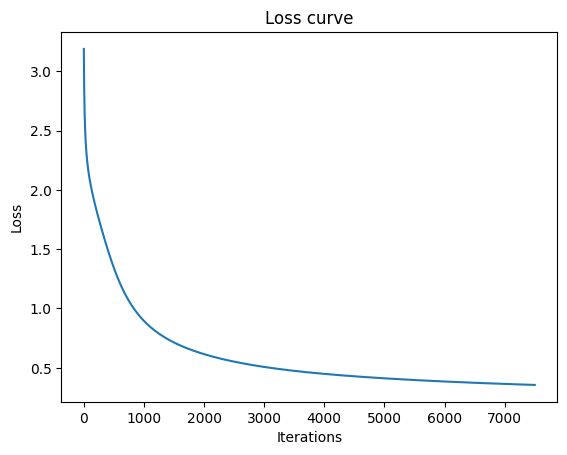

In [7]:
# Plot the losses
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

In [8]:
# Test the model using the test data
_, _, _, A2_test = forward_prop(W1, b1, W2, b2, X_test)
test_predictions = get_predictions(A2_test)
test_accuracy = get_accuracy(test_predictions, Y_test)

print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.8685833333333334
